In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/song-popularity-prediction/sample_submission.csv
/kaggle/input/song-popularity-prediction/train.csv
/kaggle/input/song-popularity-prediction/test.csv


# Introduction.

This competition is a Kaggle Community Competition hosted by Abhishek Thakur & MLSpace.

The purpose of the competition is to predict song popularity based on different features provided in the dataset.

The data consists of the standard Kaggle 'train.csv' and 'test.csv' files, with a sample_submission.csv' to show you the structure of the file to be submitted.

## Overview of Features.
### Thanks to Remek Kinas!

Spotify Audio Features
For every track on their platform, Spotify provides data for thirteen Audio Features.The Spotify Web API developer guide defines them as follows:

>**Danceability:**
>Describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity.

>**Valence:**
Describes the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

>**Energy:**
Represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale.

>**Tempo:**
The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece, and derives directly from the average beat duration.

>**Loudness:**
The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks.

>**Speechiness**
This detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value.

>**Instrumentalness:**
Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”.

>**Liveness:**
Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live.

>**Acousticness:**
A confidence measure from 0.0 to 1.0 of whether the track is acoustic.

>**Key:**
The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on.

>**Mode:**
Indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

>**Duration:**
The duration of the track in milliseconds.

>**Time Signature:**
An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).


## Exploratory Data Analysis.
### Following Tutorial by Martin Henze (Heads or Tails)

***

In [2]:
# Load train dataset and review top 5 rows.
# Notice multiple NaN entries and data scaling issues.
train = pd.read_csv('../input/song-popularity-prediction/train.csv')
train.head(20)

,id,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,song_popularity
0,0,212990.0,0.642286,0.856520,0.707073,0.002001,10.0,NaN,-5.619088,0,0.082570,158.386236,4,0.734642,0
1,1,NaN,0.054866,0.733289,0.835545,0.000996,8.0,0.436428,-5.236965,1,0.127358,102.752988,3,0.711531,1
2,2,193213.0,NaN,0.188387,0.783524,-0.002694,5.0,0.170499,-4.951759,0,0.052282,178.685791,3,0.425536,0
3,3,249893.0,0.488660,0.585234,0.552685,0.000608,0.0,0.094805,-7.893694,0,0.035618,128.715630,3,0.453597,0
4,4,165969.0,0.493017,NaN,0.740982,0.002033,10.0,0.094891,-2.684095,0,0.050746,121.928157,4,0.741311,0
5,5,188891.0,0.035655,0.825919,0.804528,-0.000005,4.0,0.120758,-6.122926,0,0.039012,115.679128,4,0.709408,0
6,6,161061.0,0.081743,0.673588,0.880181,0.000327,0.0,0.535411,-2.909607,1,0.030902,98.046205,4,0.982729,0
7,7,196202.0,0.259747,0.813214,0.554385,0.000390,8.0,0.276580,-7.794237,0,0.207067,158.626764,3,0.662987,1
8,8,169660.0,NaN,0.653263,0.917034,0.001748,0.0,NaN,-4.422089,0,0.031608,122.382398,3,0.297683,1
9,9,167245.0,0.019617,0.595235,0.820039,0.761884,5.0,0.181098,-5.154293,0,0.054493,110.524824,4,0.535453,0


In [3]:
# Load test dataset and review top 5 rows.
# Notice multiple NaN entries and data scaling issues.
test = pd.read_csv('../input/song-popularity-prediction/test.csv')
test.head(20)

,id,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,0,308523.0,0.019845,NaN,0.908939,0.001438,NaN,0.112832,-8.890172,0,0.082714,126.129304,4,0.399620
1,1,200011.0,0.070119,0.731256,0.444655,0.002020,10.0,0.139040,-6.301214,0,0.061685,86.448149,3,0.499424
2,2,279758.0,0.810637,0.568858,0.125466,0.898841,0.0,0.226614,-11.542478,0,0.041868,99.544351,3,0.564951
3,3,249197.0,NaN,0.871789,0.557342,0.000715,4.0,0.325391,-7.905546,1,0.046815,123.063854,4,0.906485
4,4,NaN,0.765568,0.624687,0.710794,0.000346,8.0,0.308284,NaN,0,0.129284,88.703121,3,0.935571
5,5,169177.0,NaN,NaN,0.472133,0.003212,7.0,0.128111,-5.144205,1,0.034303,121.231639,3,0.605505
6,6,204494.0,0.224645,0.792581,0.590591,0.003111,NaN,0.274322,-6.354701,1,0.218664,137.397394,3,0.942449
7,7,211966.0,0.016263,0.205918,0.696829,0.000163,5.0,0.173797,-6.418323,1,0.035798,179.340376,3,0.262285
8,8,197352.0,0.074148,0.584279,0.639161,0.003663,7.0,0.217238,-17.224436,1,0.063982,89.636012,3,0.527236
9,9,185868.0,NaN,0.586735,0.988365,0.001690,7.0,0.346021,-2.665717,1,0.043829,111.751967,3,0.412969


In [4]:
# List columns of train dataset.
train.columns

Index(['id', 'song_duration_ms', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'audio_mode',
       'speechiness', 'tempo', 'time_signature', 'audio_valence',
       'song_popularity'],
      dtype='object')

In [5]:
# Review dataframe datatypes etc.
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                40000 non-null  int64  
 1   song_duration_ms  35899 non-null  float64
 2   acousticness      36008 non-null  float64
 3   danceability      35974 non-null  float64
 4   energy            36025 non-null  float64
 5   instrumentalness  36015 non-null  float64
 6   key               35935 non-null  float64
 7   liveness          35914 non-null  float64
 8   loudness          36043 non-null  float64
 9   audio_mode        40000 non-null  int64  
 10  speechiness       40000 non-null  float64
 11  tempo             40000 non-null  float64
 12  time_signature    40000 non-null  int64  
 13  audio_valence     40000 non-null  float64
 14  song_popularity   40000 non-null  int64  
dtypes: float64(11), int64(4)
memory usage: 4.6 MB


In [6]:
# Review some preliminary stats for train dataset.
train.describe()

,id,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,song_popularity
count,40000.00000,35899.000000,36008.000000,35974.000000,36025.000000,36015.000000,35935.000000,35914.000000,36043.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,19999.50000,193165.847572,0.276404,0.570951,0.683932,0.036527,5.042605,0.198514,-7.407596,0.321150,0.094107,116.562815,3.394375,0.580645,0.364400
std,11547.14972,45822.127679,0.297928,0.190010,0.212662,0.150024,3.372728,0.151670,3.877198,0.466924,0.083591,26.167911,0.524405,0.237351,0.481268
min,0.00000,25658.000000,-0.013551,0.043961,-0.001682,-0.004398,0.000000,0.027843,-32.117911,0.000000,0.015065,62.055779,2.000000,0.013398,0.000000
25%,9999.75000,166254.500000,0.039618,0.424760,0.539276,0.000941,2.000000,0.111796,-9.578139,0.000000,0.038500,96.995309,3.000000,0.398669,0.000000
50%,19999.50000,186660.000000,0.140532,0.608234,0.704453,0.001974,5.000000,0.135945,-6.345413,0.000000,0.055881,113.795959,3.000000,0.598827,0.000000
75%,29999.25000,215116.000000,0.482499,0.718464,0.870503,0.003225,8.000000,0.212842,-4.620711,1.000000,0.118842,128.517383,4.000000,0.759635,1.000000
max,39999.00000,491671.000000,1.065284,0.957131,1.039741,1.075415,11.000000,1.065298,-0.877346,1.000000,0.560748,219.163578,5.000000,1.022558,1.000000


In [7]:
# Count missing values in both train and test data sets.
print(f'Number of missing values in train = {sum(train.isnull().sum())}')
print(f'Number of missing values in test = {sum(test.isnull().sum())}')


Number of missing values in train = 32187
Number of missing values in test = 7962


<AxesSubplot:>

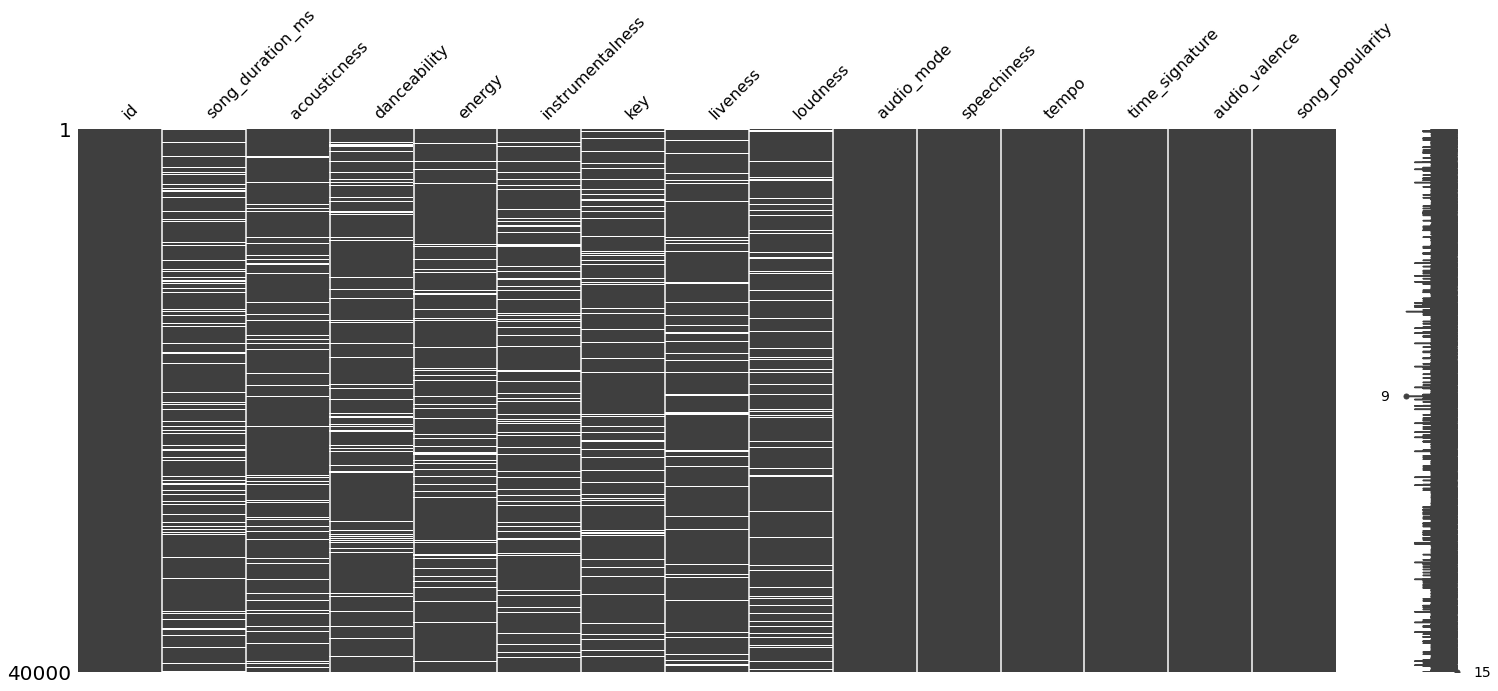

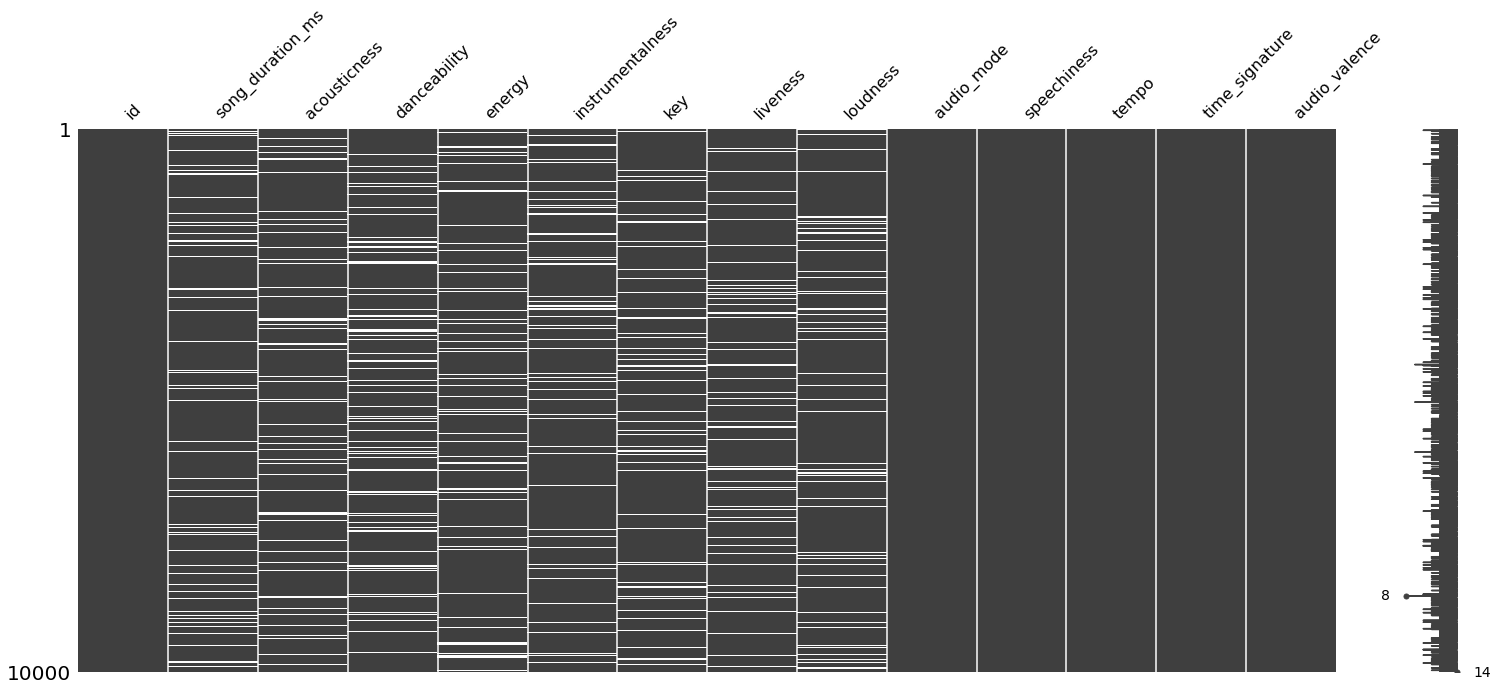

In [8]:
# Visualize missing data matrices for train and test
import missingno as msno
msno.matrix(train)
msno.matrix(test)

In [9]:
# Import plotting packages and set styles etc.
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
#sns.set(rc={'figure.figsize':(12,8)})

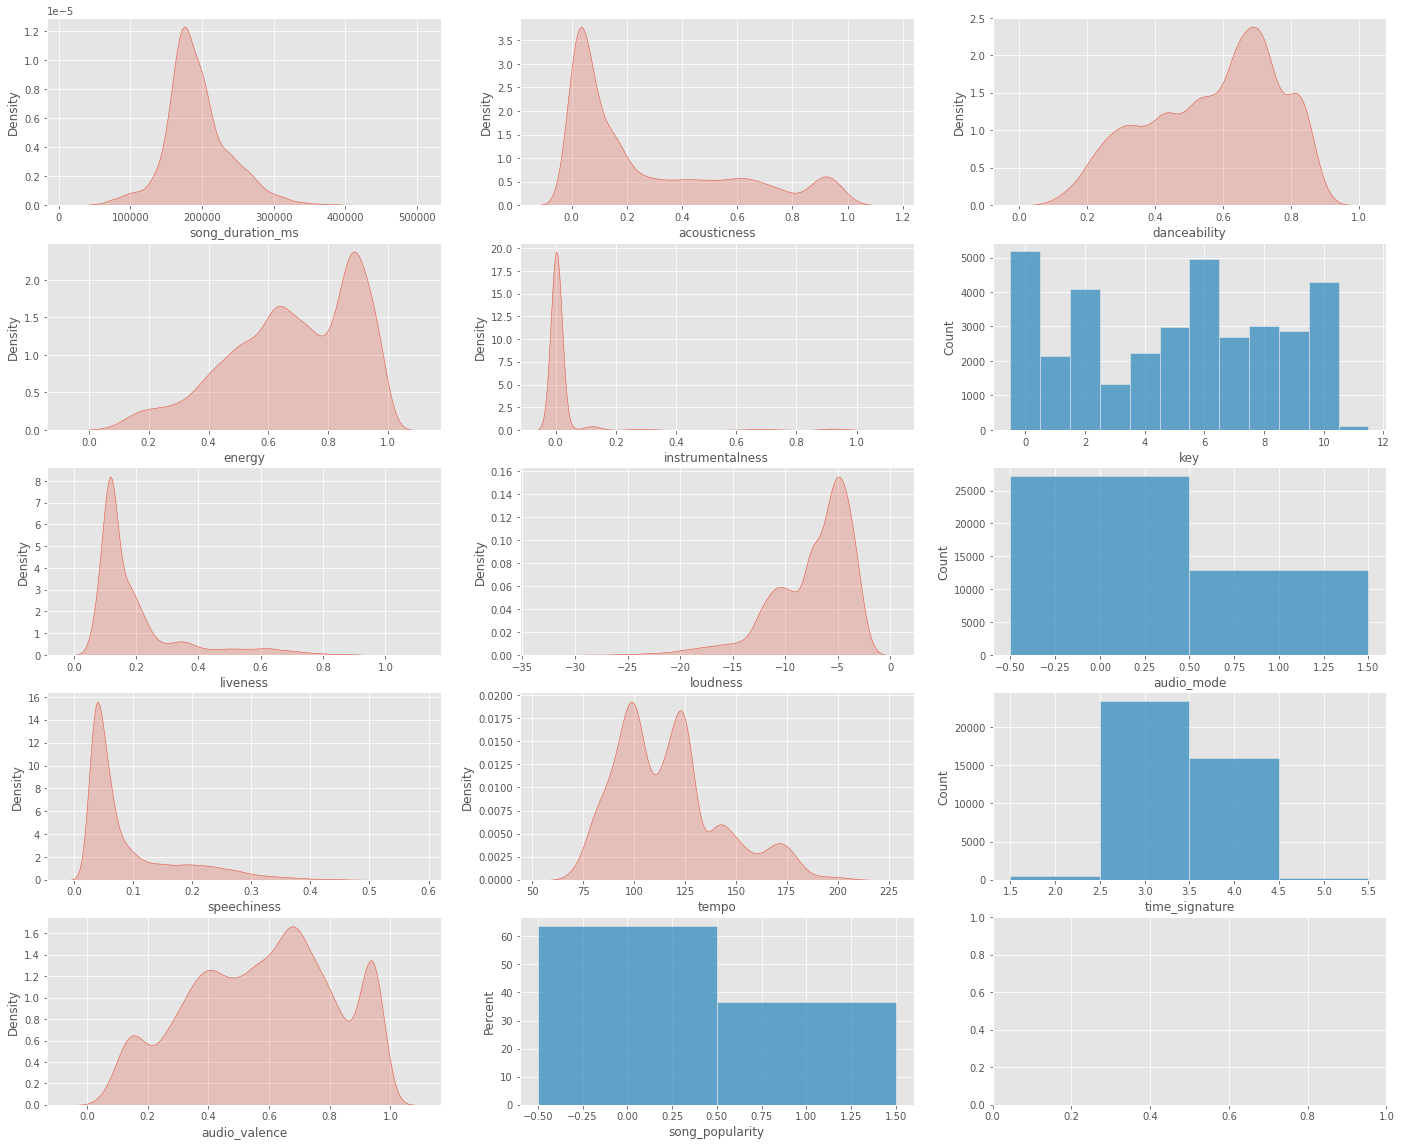

In [10]:
# Plot distributions of variables in matrix.
fig, axes = plt.subplots(5,3, figsize=(24,20))
sns.kdeplot(data=train, x='song_duration_ms', fill=True, ax=axes[0,0])
sns.kdeplot(data=train, x='acousticness', fill=True, ax=axes[0,1])
sns.kdeplot(data=train, x='danceability', fill=True, ax=axes[0,2])

sns.kdeplot(data=train, x='energy', fill=True, ax=axes[1,0])
sns.kdeplot(data=train, x='instrumentalness', fill=True, ax=axes[1,1])
sns.histplot(data=train, x='key', fill=True, stat='count',
             discrete=True, ax=axes[1,2])

sns.kdeplot(data=train, x='liveness', fill=True, ax=axes[2,0])
sns.kdeplot(data=train, x='loudness', fill=True, ax=axes[2,1])
sns.histplot(data=train, x='audio_mode', fill=True, stat='count',
             discrete=True, ax=axes[2,2], bins=2)

sns.kdeplot(data=train, x='speechiness', fill=True, ax=axes[3,0])
sns.kdeplot(data=train, x='tempo', fill=True, ax=axes[3,1])
sns.histplot(data=train, x='time_signature', fill=True, stat='count',
             discrete=True, ax=axes[3,2])

sns.kdeplot(data=train, x='audio_valence', fill=True, ax=axes[4,0])
sns.histplot(data=train, x='song_popularity', fill=True, stat='percent',
             discrete=True, ax=axes[4,1])

plt.show()

#### Distributions.

From the KDE plots above we can identify several issues.

1. Scale: acousticness, danceability, energy, instrumentalness, liveness, speechiness and audio_valence have a scale of ~0.0 - ~1.0. loudness is a negative value ranging from -32 to ~0. Tempo ranges from 62 - 219 while song duration ranges from 25658 to 491671.

2. song_duration_ms is the only parameter that could almost be described as approaching a Gaussian distribution. We will need to transform many of the other continuous parameters.

3. Key, audio_mode. time_signature and our target variable song_popularity are categorical / boolean variables.

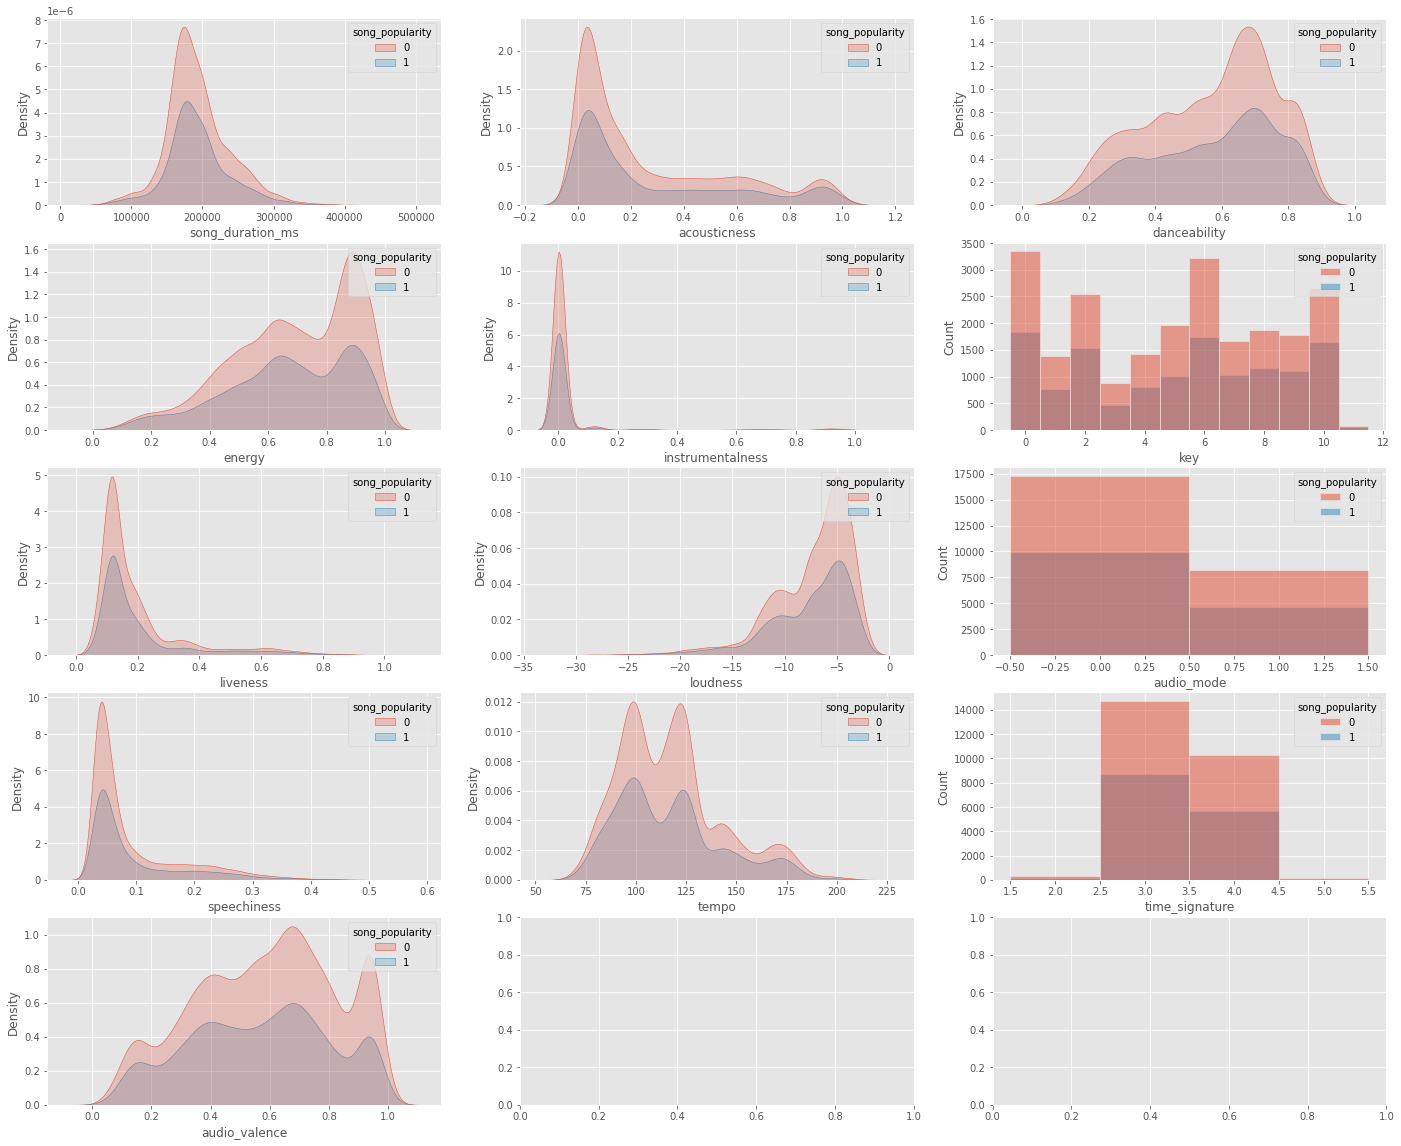

In [11]:
# Target Variable Impact

# Plot distributions of variables in matrix coloured by target variable 'song_popuularity'.
fig, axes = plt.subplots(5,3, figsize=(24,20))
sns.kdeplot(data=train, x='song_duration_ms', fill=True, ax=axes[0,0], hue='song_popularity')
sns.kdeplot(data=train, x='acousticness', fill=True, ax=axes[0,1], hue='song_popularity')
sns.kdeplot(data=train, x='danceability', fill=True, ax=axes[0,2], hue='song_popularity')

sns.kdeplot(data=train, x='energy', fill=True, ax=axes[1,0], hue='song_popularity')
sns.kdeplot(data=train, x='instrumentalness', fill=True, ax=axes[1,1], hue='song_popularity')
sns.histplot(data=train, x='key', fill=True, stat='count',
             discrete=True, ax=axes[1,2], hue='song_popularity')

sns.kdeplot(data=train, x='liveness', fill=True, ax=axes[2,0], hue='song_popularity')
sns.kdeplot(data=train, x='loudness', fill=True, ax=axes[2,1], hue='song_popularity')
sns.histplot(data=train, x='audio_mode', fill=True, stat='count',
             discrete=True, ax=axes[2,2], bins=2, hue='song_popularity')

sns.kdeplot(data=train, x='speechiness', fill=True, ax=axes[3,0], hue='song_popularity')
sns.kdeplot(data=train, x='tempo', fill=True, ax=axes[3,1], hue='song_popularity')
sns.histplot(data=train, x='time_signature', fill=True, stat='count',
             discrete=True, ax=axes[3,2], hue='song_popularity')

sns.kdeplot(data=train, x='audio_valence', fill=True, ax=axes[4,0], hue='song_popularity')

plt.show()

Reviewing the KDE plots by target variable does not provide any further information. The parameter distributions for song_popularity = 0 are almost identical to the distributions when song_popularity = 1.

In [12]:
# View correlation matrix for all variables.
train.corr()

,id,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,song_popularity
id,1.000000,-0.004428,-0.002733,-0.003237,0.000051,0.001087,-0.001492,-0.004756,0.005135,0.002538,0.002792,-0.001297,-0.002199,-0.001016,-0.003074
song_duration_ms,-0.004428,1.000000,-0.166443,-0.061929,0.148531,-0.024337,0.019354,0.033009,0.152954,-0.017211,-0.001236,0.085490,0.021609,-0.006948,-0.003960
acousticness,-0.002733,-0.166443,1.000000,-0.093737,-0.570177,0.072516,-0.186663,-0.124704,-0.532724,0.066973,-0.130244,-0.190964,-0.205307,-0.250310,0.025298
danceability,-0.003237,-0.061929,-0.093737,1.000000,0.099933,-0.146447,0.120514,0.045400,0.200148,0.030289,0.177937,-0.089887,0.016455,0.384496,0.017572
energy,0.000051,0.148531,-0.570177,0.099933,1.000000,-0.120338,0.210176,0.154907,0.643931,-0.094916,0.120053,0.225465,0.238722,0.324626,-0.054640
instrumentalness,0.001087,-0.024337,0.072516,-0.146447,-0.120338,1.000000,-0.054726,-0.033445,-0.181889,-0.003617,-0.053209,-0.010350,-0.047397,-0.157760,-0.009511
key,-0.001492,0.019354,-0.186663,0.120514,0.210176,-0.054726,1.000000,0.077046,0.201509,-0.036252,0.102993,0.053206,0.094144,0.132194,0.017808
liveness,-0.004756,0.033009,-0.124704,0.045400,0.154907,-0.033445,0.077046,1.000000,0.146551,-0.013281,0.076612,0.064425,0.037766,0.084770,0.016571
loudness,0.005135,0.152954,-0.532724,0.200148,0.643931,-0.181889,0.201509,0.146551,1.000000,-0.076893,0.157550,0.173979,0.245403,0.356330,-0.040662
audio_mode,0.002538,-0.017211,0.066973,0.030289,-0.094916,-0.003617,-0.036252,-0.013281,-0.076893,1.000000,0.019790,-0.023202,-0.043714,-0.015683,-0.001455


Need to transform skewness: start with log, box cox. Check Scikit learn for general feature transformations.
We have imbalance in the target variable (much higher percentage 0 than 1)

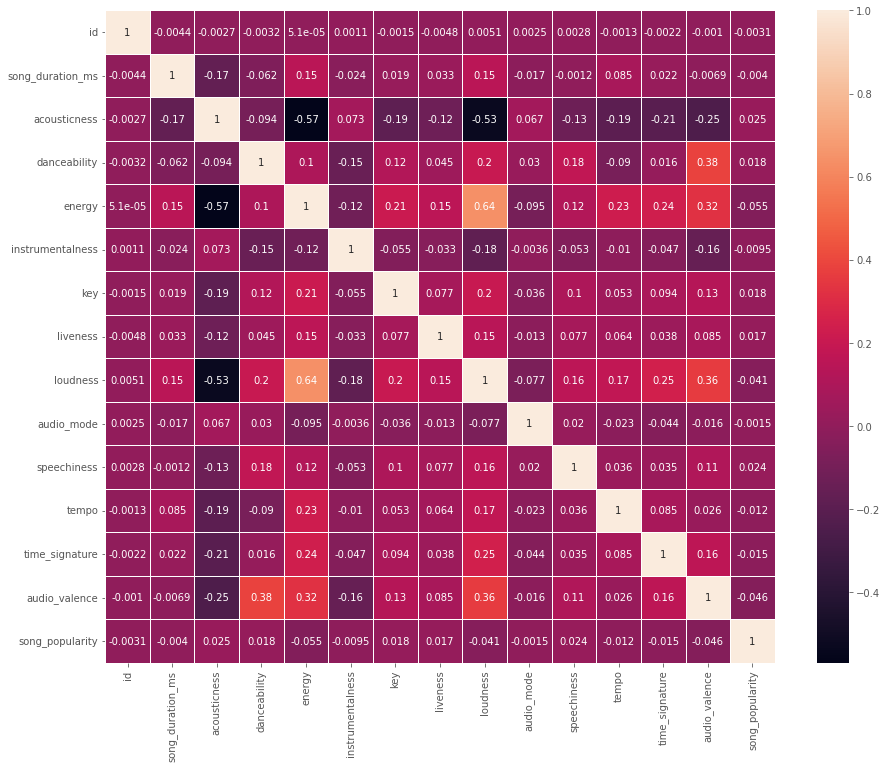

In [13]:
## Visualising correlations in heatmap.
fig, ax = plt.subplots(figsize=(15,12))
sns.heatmap(train.corr(), annot=True, linewidths=0.5)
plt.show()

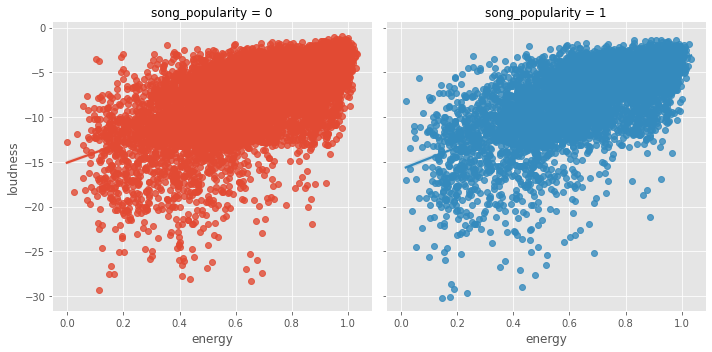

In [14]:
# drop NaN values and check correlation.
df = train.dropna(axis=0)
sns.lmplot(data=df, x='energy', y='loudness', hue='song_popularity',
           col='song_popularity')
plt.show()


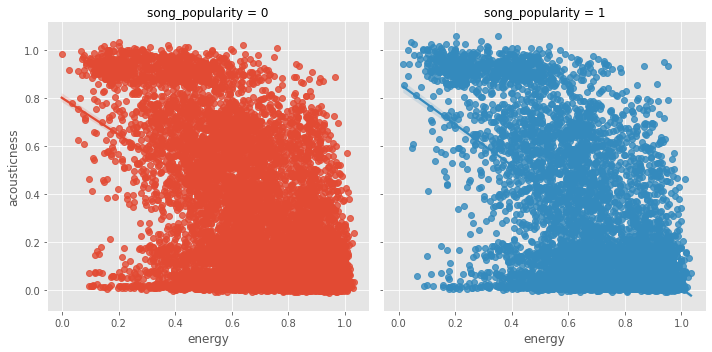

In [15]:
df = train.dropna(axis=0)
sns.lmplot(data=df, x='energy', y='acousticness', hue='song_popularity',
           col='song_popularity')
plt.show()

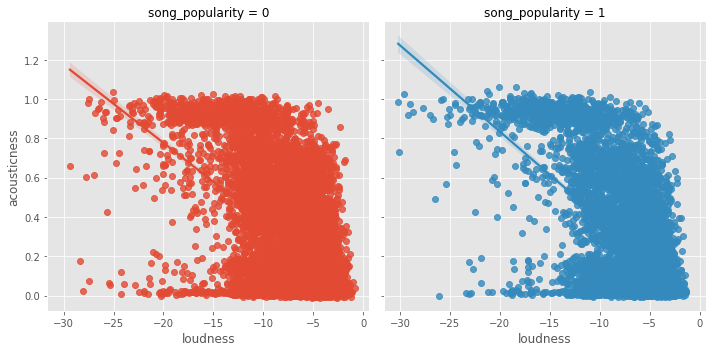

In [16]:
df = train.dropna(axis=0)
sns.lmplot(data=df, x='loudness', y='acousticness', hue='song_popularity',
           col='song_popularity')
plt.show()